<a href="https://colab.research.google.com/github/mikemwai/signsense/blob/development/signsense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
!pip install pillow
!pip install gdown

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
import cv2
import matplotlib.image as mpimg
import seaborn as sns
import gdown
import zipfile
from sklearn.model_selection import train_test_split
from PIL import Image, ExifTags
from google.colab import drive

# Import Dataset

## Downloading the dataset

In [ ]:
file_id = "1X-UGatEzbwczAI3iBF2RQsfh6dtgBKHF"

url = f"https://drive.google.com/uc?id={file_id}"

output = "combined_dataset.zip"

gdown.download(url, output, quiet=False)

import zipfile
import os

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall()

print("Contents of the extracted folder:")
os.system('ls')

Downloading...
From (original): https://drive.google.com/uc?id=1X-UGatEzbwczAI3iBF2RQsfh6dtgBKHF
From (redirected): https://drive.google.com/uc?id=1X-UGatEzbwczAI3iBF2RQsfh6dtgBKHF&confirm=t&uuid=796c3131-b7e5-4303-aa8c-990a5291c030
To: /content/combined_dataset.zip
100%|██████████| 956M/956M [03:00<00:00, 5.29MB/s]


Contents of the extracted folder:


0

## Checking for any errors in the dataset

In [ ]:
!unzip -t combined_dataset.zip

Archive:  combined_dataset.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of combined_dataset.zip or
        combined_dataset.zip.zip, and cannot find combined_dataset.zip.ZIP, period.


## Extracting the zip folder

In [ ]:
z = zipfile.ZipFile('dataset.zip')
z.extractall()
print("Extraction complete!")

Extraction complete!


# Dataset Splitting

In [ ]:
dataset_dir = 'combined_dataset'

train_ratio = 0.7
test_ratio = 0.2
val_ratio = 0.1

splits = ['train', 'valid', 'test']
output_dir = 'dataset_split'
os.makedirs(output_dir, exist_ok=True)
for split in splits:
    for category in os.listdir(dataset_dir):
        os.makedirs(os.path.join(output_dir, split, category), exist_ok=True)

for category in os.listdir(dataset_dir):
    category_path = os.path.join(dataset_dir, category)

    images = os.listdir(category_path)

    train_images, test_images = train_test_split(images, test_size=(test_ratio + val_ratio))
    val_images, test_images = train_test_split(test_images, test_size=test_ratio/(test_ratio + val_ratio))

    def copy_images(image_list, split):
        for image in image_list:
            src = os.path.join(category_path, image)
            dst = os.path.join(output_dir, split, category, image)
            shutil.copyfile(src, dst)

    copy_images(train_images, 'train')
    copy_images(val_images, 'valid')
    copy_images(test_images, 'test')

print("Dataset split into train, valid, and test sets successfully!")

Dataset split into train, valid, and test sets successfully!


In [ ]:
class_names = ['church', 'enough', 'friend', 'love', 'me', 'mosque', 'seat', 'temple', 'you']

image_directories = ['./dataset/train/images', './dataset/valid/images', './dataset/test/images']
label_directories = ['./dataset/train/labels', './dataset/valid/labels', './dataset/test/labels']

output_directory = './sorted_by_class'

for class_name in class_names:
    class_folder = os.path.join(output_directory, class_name)
    os.makedirs(class_folder, exist_ok=True)

for img_dir, lbl_dir in zip(image_directories, label_directories):
    for label_file in os.listdir(lbl_dir):
        label_path = os.path.join(lbl_dir, label_file)
        with open(label_path, 'r') as f:
            lines = f.readlines()

        for line in lines:
            class_id = int(line.split()[0])

            img_file = label_file.replace('.txt', '.jpg')
            img_path = os.path.join(img_dir, img_file)

            if os.path.exists(img_path):
                dest_folder = os.path.join(output_directory, class_names[class_id])
                shutil.copy(img_path, dest_folder)

## Compressing the new dataset folder to a zip file

In [ ]:
folder_to_zip = 'dataset_split'

output_zip_file = 'dataset_split.zip'

shutil.make_archive(output_zip_file.replace('.zip', ''), 'zip', folder_to_zip)

print(f"Folder '{folder_to_zip}' has been successfully compressed into '{output_zip_file}'")

Folder 'dataset_split' has been successfully compressed into 'dataset_split.zip'


## Deleting any folder

In [ ]:
shutil.rmtree('path_to_augmented_dataset')

# Exploratory Data Analysis

In [ ]:
total_images = 0
total_videos = 0

for root, dirs, files in os.walk("dataset_split"):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):
            total_images += 1
        elif file.endswith(('.mp4', '.avi', '.mkv', '.MOV', '.wmv')):
            total_videos += 1

print(f'{total_images} images')
print(f'{total_videos} videos')

18702 images
0 videos


In [ ]:
test_images = 0
train_images = 0
valid_images = 0
test_videos = 0
train_videos = 0
valid_videos = 0

for root, dirs, files in os.walk("dataset_split"):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):
            if 'test' in root:
                test_images += 1
            elif 'train' in root:
                train_images += 1
            elif 'valid' in root:
                valid_images += 1
        elif file.endswith(('.mp4', '.avi', '.mkv', '.MOV', '.wmv')):
            if 'test' in root:
                test_videos += 1
            elif 'train' in root:
                train_videos += 1
            elif 'valid' in root:
                valid_videos += 1

print(f'test: {test_images} images, {test_videos} videos')
print(f'train: {train_images} images, {train_videos} videos')
print(f'valid: {valid_images} images, {valid_videos} videos')

test: 3748 images, 0 videos
train: 13085 images, 0 videos
valid: 1869 images, 0 videos


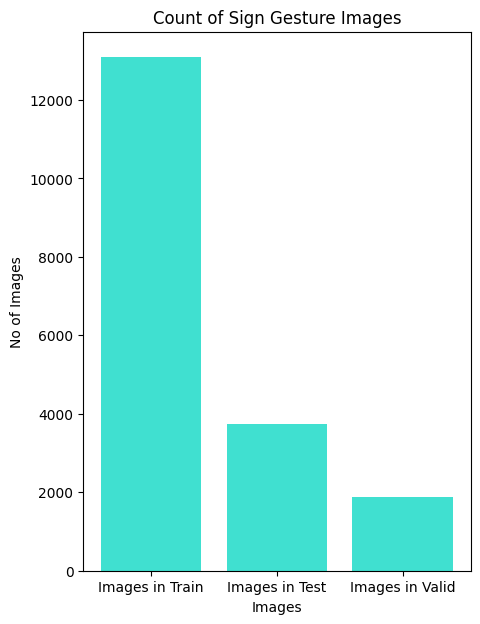

In [ ]:
data = {'Images in Train': train_images, 'Images in Test': test_images, 'Images in Valid': valid_images}

typex = data.keys()
values = data.values()

fig = plt.figure(figsize=(5,7))

plt.bar(typex, values, color="turquoise")

plt.xlabel("Images")
plt.ylabel("No of Images")
plt.title("Count of Sign Gesture Images")
plt.show()

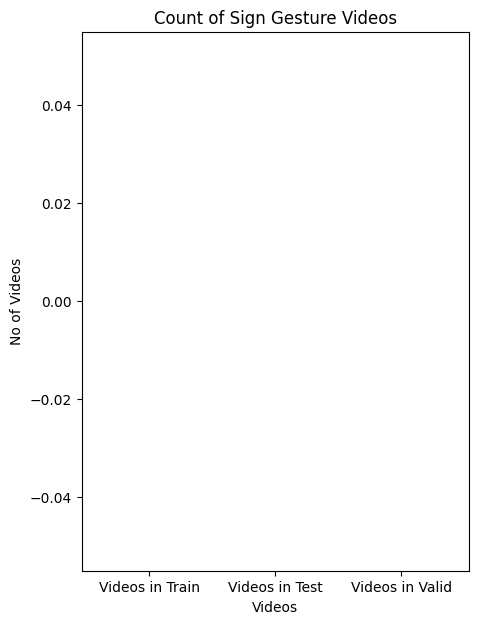

In [ ]:
data = {'Videos in Train': train_videos, 'Videos in Test': test_videos, 'Videos in Valid': valid_videos}

typex = data.keys()
values = data.values()

fig = plt.figure(figsize=(5,7))

plt.bar(typex, values, color="turquoise")

plt.xlabel("Videos")
plt.ylabel("No of Videos")
plt.title("Count of Sign Gesture Videos")
plt.show()

# Data Preprocessing

In [ ]:
input_dir = 'splitted_dataset'
output_dir = 'preprocessed_dataset'

os.makedirs(output_dir, exist_ok=True)

def preprocess_image(image_path, output_path, size=(640, 640)):
    try:
        with Image.open(image_path) as img:
            try:
                for orientation in ExifTags.TAGS.keys():
                    if ExifTags.TAGS[orientation] == 'Orientation':
                        break
                exif = img._getexif()
                if exif is not None:
                    orientation = exif[orientation]
                    if orientation == 3:
                        img = img.rotate(180, expand=True)
                    elif orientation == 6:
                        img = img.rotate(270, expand=True)
                    elif orientation == 8:
                        img = img.rotate(90, expand=True)
            except (AttributeError, KeyError, IndexError):
                pass

            img = img.resize(size)

            img.save(output_path)

    except Exception as e:
        print(f"Error processing {image_path}: {e}")

for root, dirs, files in os.walk(input_dir):
    for file in files:
        image_path = os.path.join(root, file)

        if "_jpg.rf." in file:
            print(f"Skipping already preprocessed Roboflow image: {image_path}")
            continue

        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
            relative_path = os.path.relpath(root, input_dir)
            output_subfolder = os.path.join(output_dir, relative_path)
            os.makedirs(output_subfolder, exist_ok=True)

            output_image_path = os.path.join(output_subfolder, file)

            preprocess_image(image_path, output_image_path)
        else:
            print(f"Skipping non-image file: {image_path}")

print("Preprocessing complete.")

Streaming output truncated to the last 5000 lines.
Skipping already preprocessed Roboflow image: splitted_dataset/test/Mosque/ImageID_CCAR78WY_jpg.rf.57abd3cf7776621b748d37a61726bb66.jpg
Skipping already preprocessed Roboflow image: splitted_dataset/test/Mosque/ImageID_R3BGBNKQ_jpg.rf.14b79b260b4b261a22c625452d11ecd1.jpg
Skipping already preprocessed Roboflow image: splitted_dataset/test/Mosque/ImageID_JGC23UW5_jpg.rf.42c6f773de440ec2983caf6f2a430383.jpg
Skipping already preprocessed Roboflow image: splitted_dataset/test/Mosque/ImageID_Y0EL310P_jpg.rf.6c892138122e0b16ae9beb4a2f2cc1ed.jpg
Skipping already preprocessed Roboflow image: splitted_dataset/test/Mosque/ImageID_4398FTMN_jpg.rf.4f844f73bd2e68de202d8354995c50c6.jpg
Skipping already preprocessed Roboflow image: splitted_dataset/test/Mosque/ImageID_T2AFXHNL_jpg.rf.e6c39ae53bec1405d5daede2380b6bb1.jpg
Skipping already preprocessed Roboflow image: splitted_dataset/test/Mosque/ImageID_YCKQA8KF_jpg.rf.2987d65d34eb1a86945f3c5968a04d9a.j

# Data Augmentation

In [ ]:
input_dir = 'preprocessed_dataset'
output_dir = 'augmented_dataset'

os.makedirs(output_dir, exist_ok=True)

def augment_image(image_path, output_path):
    try:
        with Image.open(image_path) as img:
            flipped_img = img.transpose(method=Image.FLIP_LEFT_RIGHT)
            flipped_img.save(output_path)

    except Exception as e:
        print(f"Error processing {image_path}: {e}")

for root, dirs, files in os.walk(input_dir):
    for file in files:
        image_path = os.path.join(root, file)

        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
            relative_path = os.path.relpath(root, input_dir)
            output_subfolder = os.path.join(output_dir, relative_path)
            os.makedirs(output_subfolder, exist_ok=True)

            output_image_path = os.path.join(output_subfolder, f"flipped_{file}")

            augment_image(image_path, output_image_path)
        else:
            print(f"Skipping non-image file: {image_path}")

print("Data augmentation complete.")

Data augmentation complete.
